<h1 style="text-align: center;">EDA (Exploratory data Analysis)</h1>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## data ingestion
#import libraries and creating connection with Mongodb
import pymongo
import json
client = pymongo.MongoClient("localhost")
print(client)
#defining database and collection
db = client["Regression"]
collection = db["household_power_consumption"]
#Fetching data from database
data = list(collection.find({},{'_id':0}))
df = pd.DataFrame(data)
df

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,total_metering
0,19/7/2007,09:28:00,0.210,0.084,228.56,1.0,0.0,0.0,0.0,7,0.0
1,15/12/2007,07:54:00,3.122,0.132,242.14,12.8,0.0,1.0,18.0,12,19.0
2,1/5/2009,05:22:00,1.830,0.458,242.12,7.8,0.0,1.0,18.0,5,19.0
3,2/5/2010,16:02:00,1.754,0.188,239.06,7.4,0.0,0.0,18.0,5,18.0
4,3/7/2010,23:52:00,1.272,0.250,241.00,5.4,0.0,0.0,1.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,19/8/2010,06:49:00,0.000,0.000,0.00,0.0,0.0,0.0,0.0,8,0.0
14996,8/1/2009,21:22:00,2.266,0.066,241.81,9.4,0.0,0.0,18.0,1,18.0
14997,3/9/2009,20:47:00,0.524,0.062,238.84,2.2,0.0,0.0,0.0,9,0.0
14998,2/9/2010,12:33:00,1.378,0.150,237.61,5.8,0.0,1.0,18.0,9,19.0


In [3]:
cat_feature = []
num_feature = []
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        num_feature.append(col)
    elif df[col].dtype == "O":
        cat_feature.append(col)

In [4]:
print(f"Categorical features in dataset {cat_feature}")
print(f"Numerical features in dataset {num_feature}")

Categorical features in dataset ['Date', 'Time']
Numerical features in dataset ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'month', 'total_metering']


## Univariate Analysis

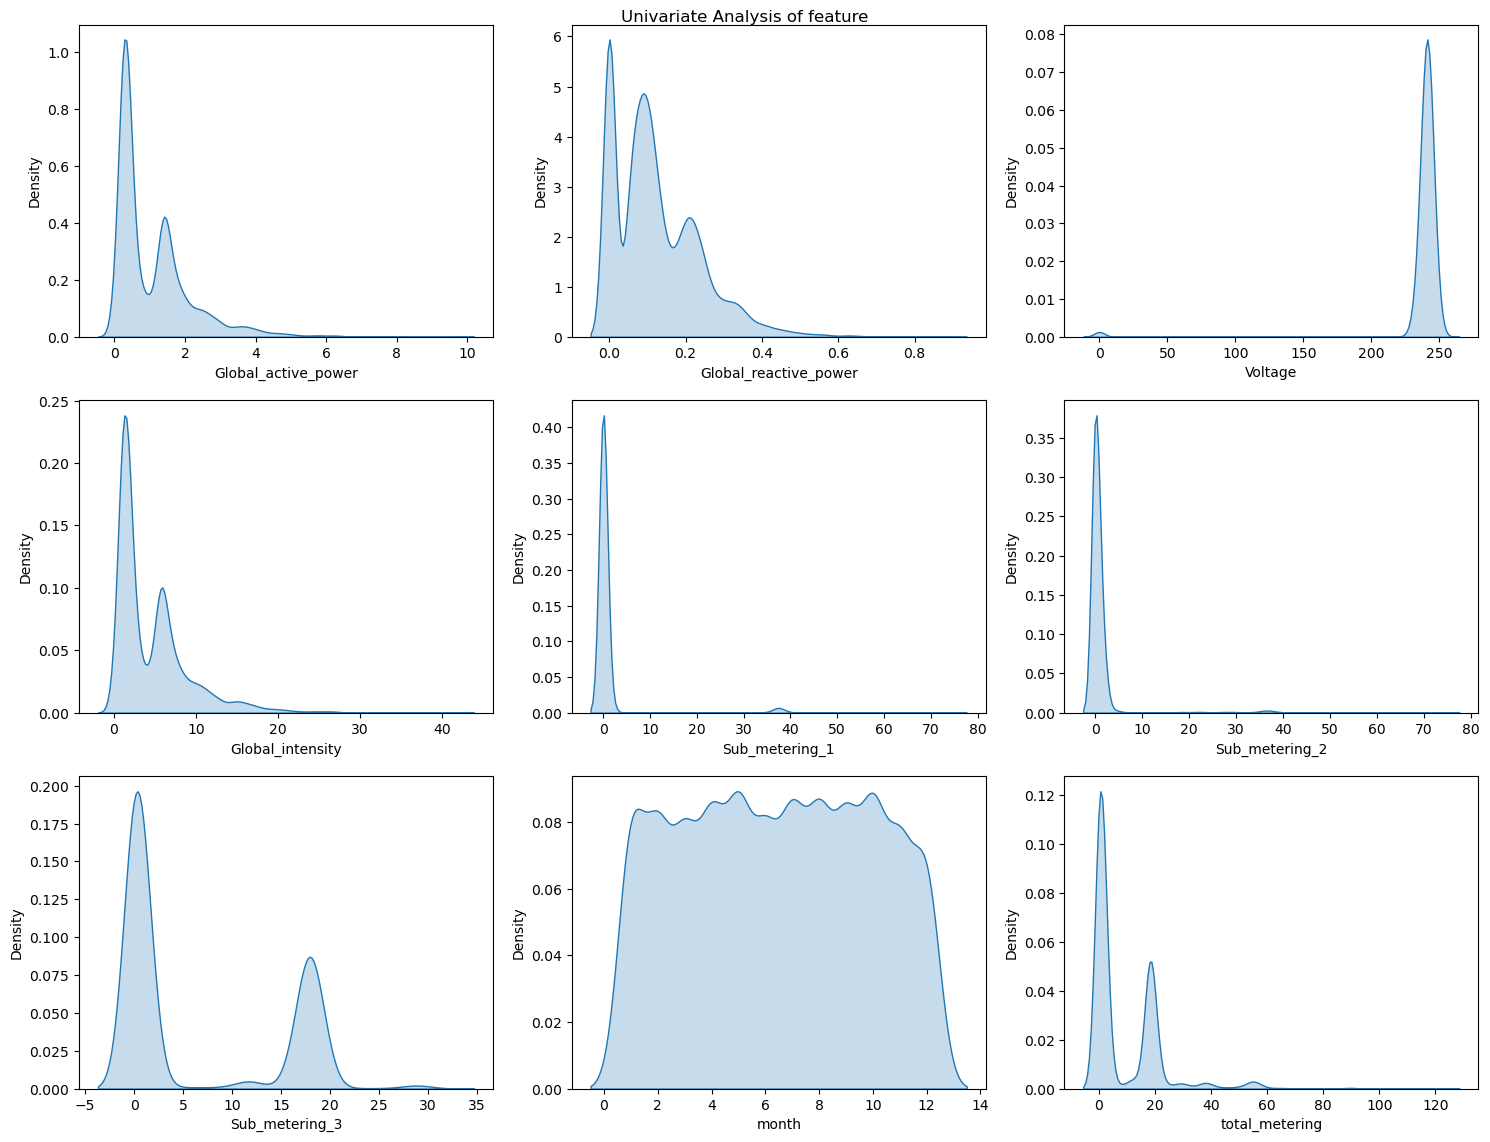

In [5]:
## Plotting KDE plot to see the distributions of the numerial features
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True)
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

* Sub metering 1,2,3 are right skewed which means it contains outliers
* Voltage feature is left skewed which means it is also contains outliers
* None of the features are normally distributed

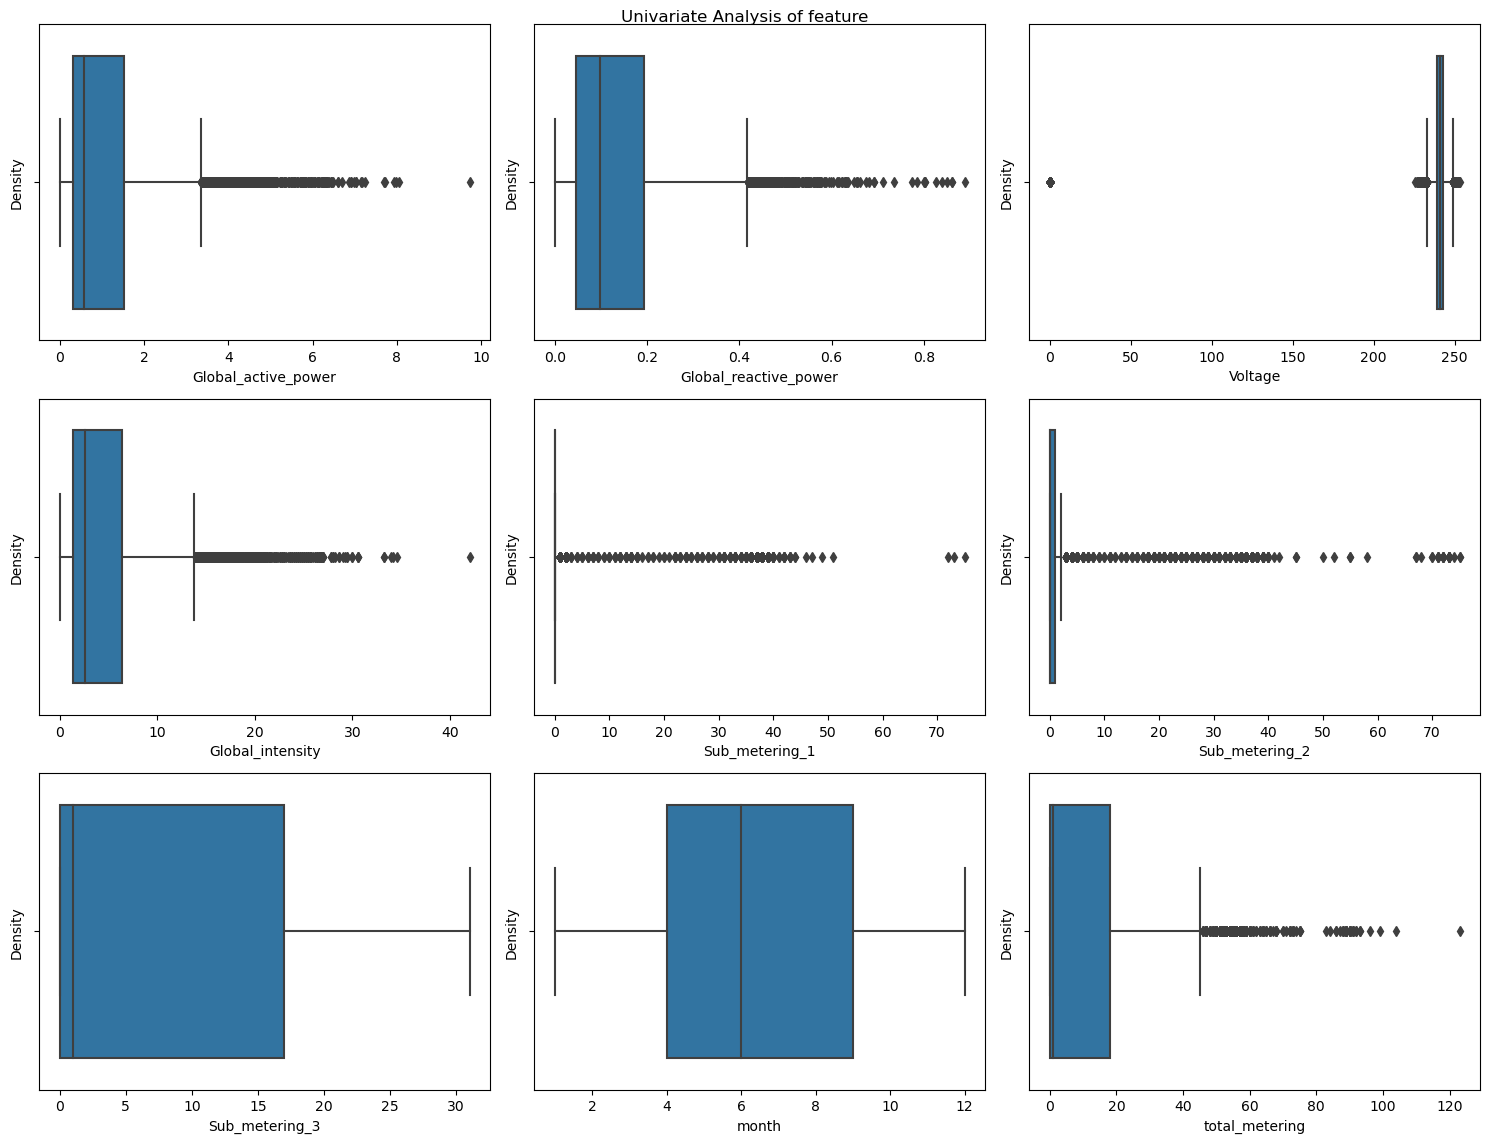

In [6]:
## plotting box plot to check outliers
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.ylabel("Density")
    plt.tight_layout()

Global active power, global reactive power and total metering contains outliers as per the box plot

## Bivariate Analysis

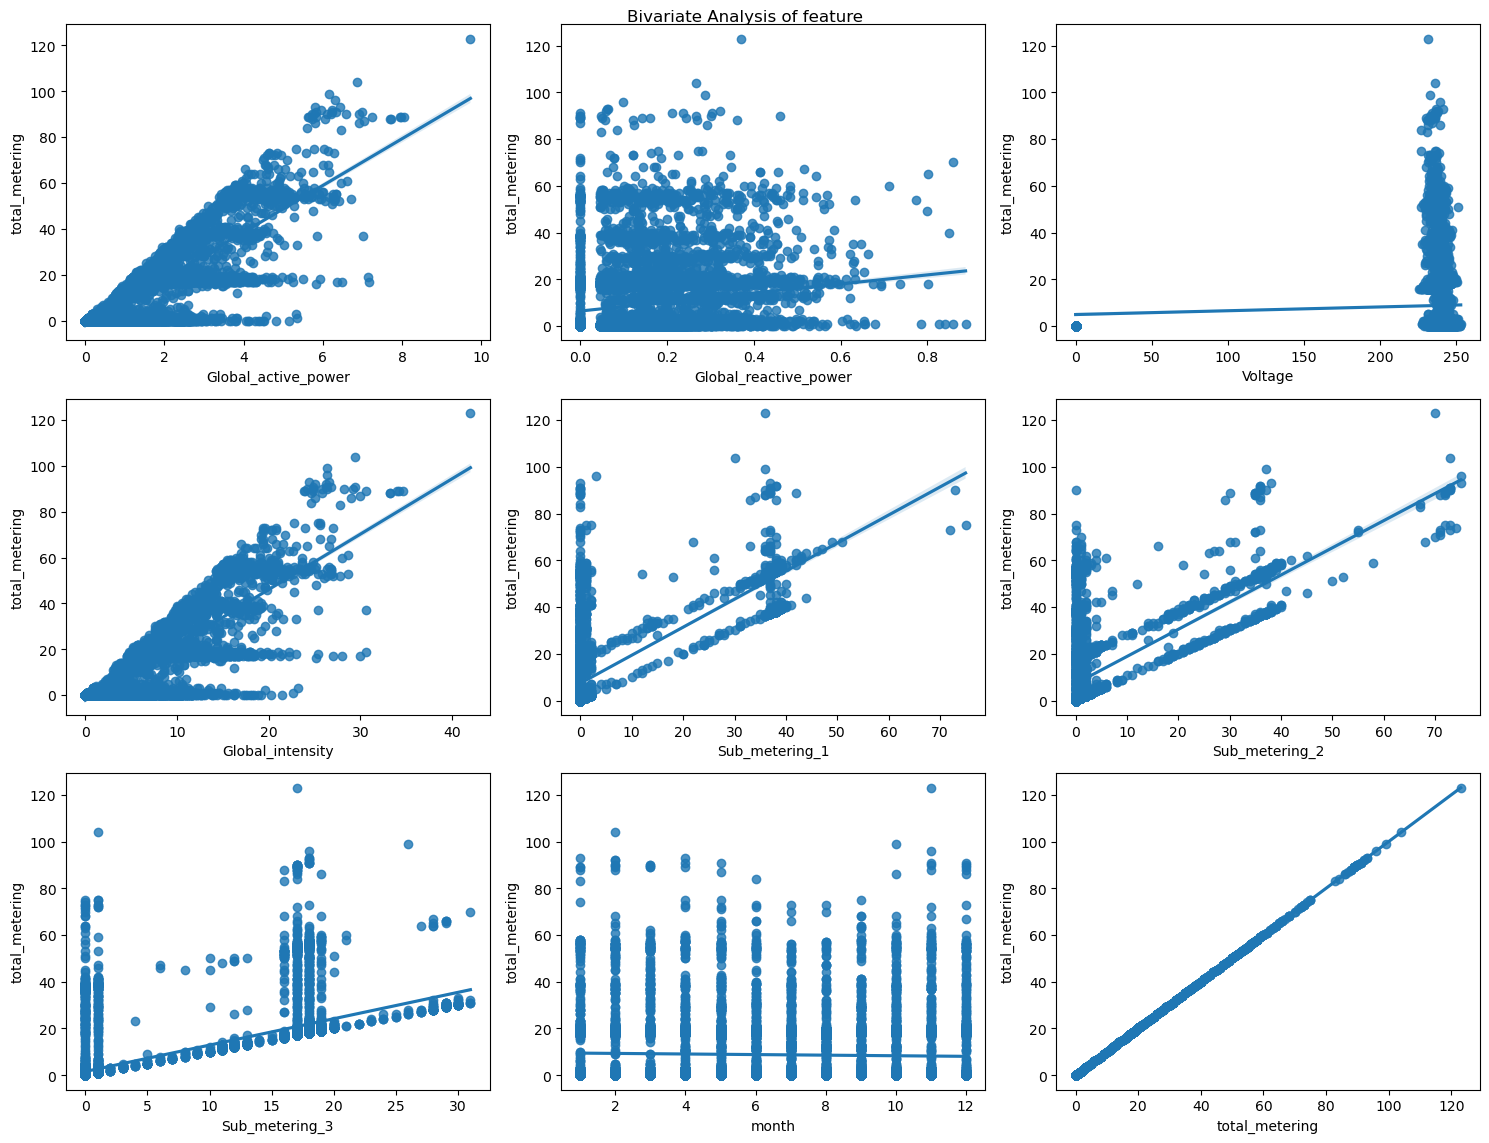

In [7]:
plt.figure(figsize=(15,15))
plt.suptitle("Bivariate Analysis of feature")

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.regplot(data=df,x=num_feature[i],y='total_metering')
    plt.xlabel(num_feature[i])
    plt.ylabel('total_metering')
    plt.tight_layout()

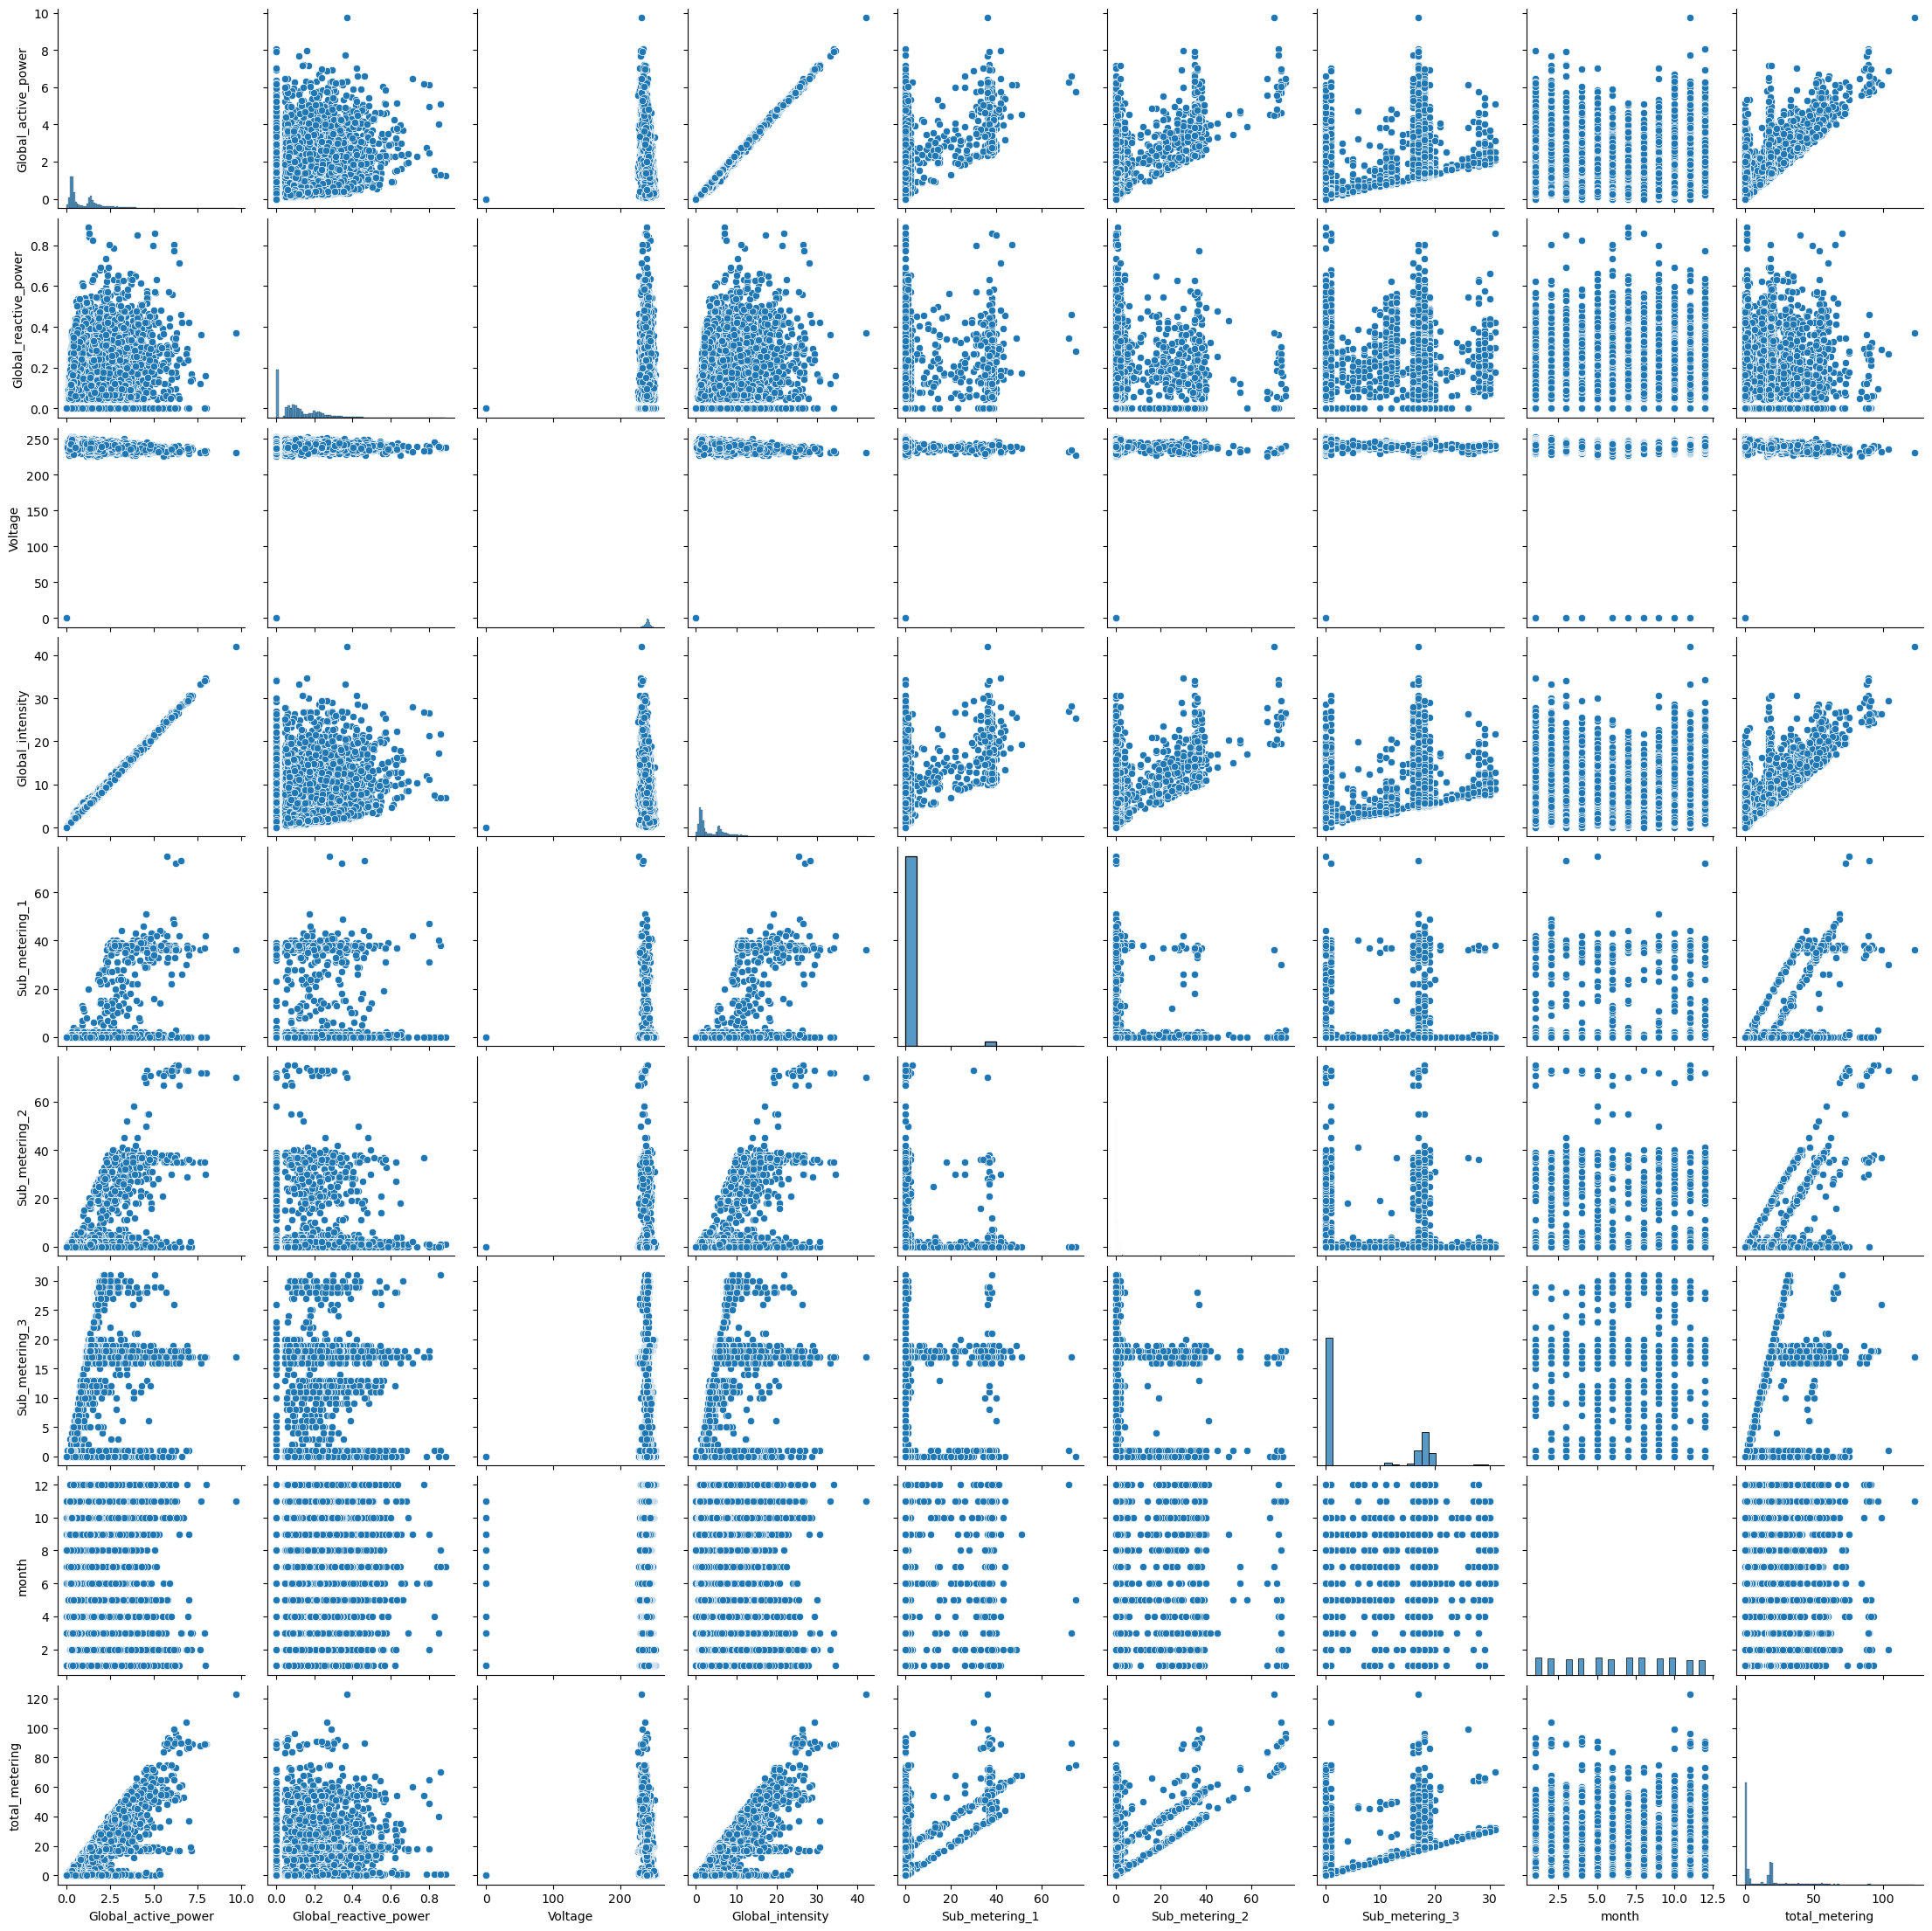

In [8]:
sns.pairplot(data=df)

## Multivariate Analysis

<AxesSubplot:>

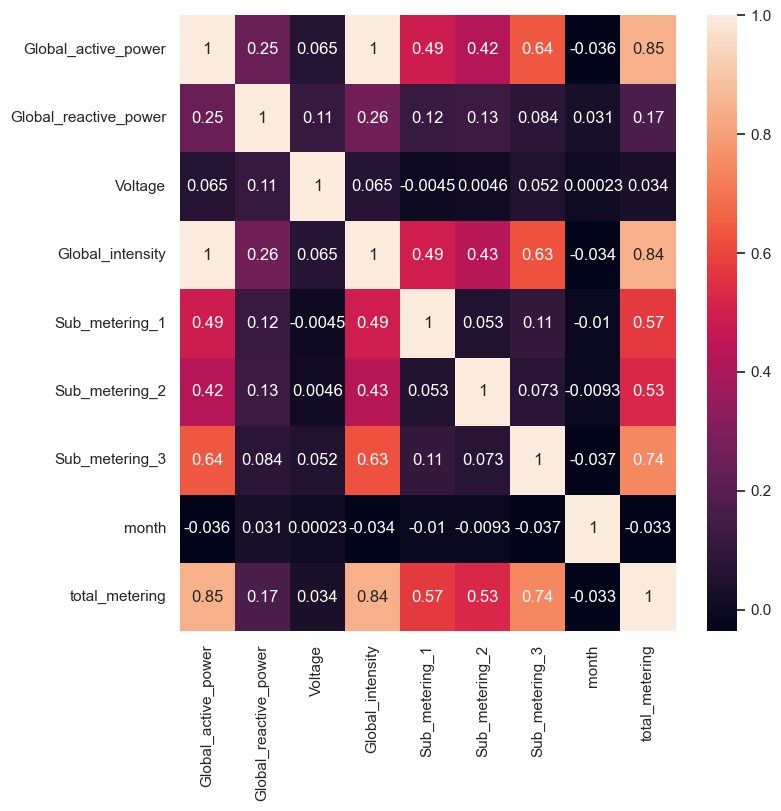

In [9]:
sns.set(rc={"figure.figsize":(8,8)})
sns.heatmap(df.corr(),annot=True)

Global active power and global intensity feature is most correlated to the consumption of electricity